In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

#SGD Regression model library
from sklearn.linear_model import SGDRegressor

### Import data

In [2]:
final_df = pd.read_csv('final_df_next_7th_day_15.csv').reset_index(drop=True)
final_df.head()

,Date,Close,High,Market_Capitalization,sma7 Close,Low,tema7 Close,tema7 Market_Capitalization,tema30 Close,bband_upper7 High,dema7 Close,bband_upper7 Average_price_per_day,dema7 Low,dema7 Average_price_per_day,sma7 High,sma7 Market_Capitalization,next_7th_day_closing_price
0,2010-07-17,0.000000e+00,0.000000e+00,0.000000e+00,1.975682e-07,0.000000e+00,2.358623e-07,4.208173e-08,5.195542e-08,4.816806e-07,2.049455e-07,4.463649e-07,2.101802e-07,2.051912e-07,1.942355e-07,3.038450e-08,0.0545
1,2010-07-18,5.298462e-07,5.204277e-07,6.270789e-08,1.975682e-07,5.393027e-07,2.358623e-07,4.208173e-08,5.195542e-08,4.816806e-07,2.049455e-07,4.463649e-07,2.101802e-07,2.051912e-07,1.942355e-07,3.038450e-08,0.0505
2,2010-07-19,4.558453e-07,4.477423e-07,9.897273e-08,1.975682e-07,4.639811e-07,2.358623e-07,4.208173e-08,5.195542e-08,4.816806e-07,2.049455e-07,4.463649e-07,2.101802e-07,2.051912e-07,1.942355e-07,3.038450e-08,0.0560
3,2010-07-20,3.655643e-07,3.590660e-07,7.901608e-08,1.975682e-07,3.720887e-07,2.358623e-07,4.208173e-08,5.195542e-08,4.816806e-07,2.049455e-07,4.463649e-07,2.101802e-07,2.051912e-07,1.942355e-07,3.038450e-08,0.0600
4,2010-07-21,4.321650e-07,4.244829e-07,7.537077e-08,1.975682e-07,4.398782e-07,2.358623e-07,4.208173e-08,5.195542e-08,4.816806e-07,2.049455e-07,4.463649e-07,2.101802e-07,2.051912e-07,1.942355e-07,3.038450e-08,0.0589


In [3]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def calculate_metrics(y, ypred):
    MAE = metrics.mean_absolute_error(y, ypred)
    MSE = metrics.mean_squared_error(y, ypred,squared=True)
    RMSE = metrics.mean_squared_error(y, ypred,squared=False)
    R2 = metrics.r2_score(y, ypred)
    return MAE,MSE,RMSE,R2

def plot_result(df,title=None):
    plt.figure(figsize=(25, 6))
    plt.plot( df.iloc[:, 1], label='Actual')
    plt.plot( df.iloc[:, 2], label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.show()

### Linear Regression using Stochastic Gradient Descent

In [4]:
# Determine the size of the train and test set
test_size = 0.3
n_test = int(np.round(len(final_df) * test_size))
train_split = final_df[:len(final_df)-n_test]
test_split = final_df[len(final_df)-n_test:]

x_train = train_split.drop(['next_7th_day_closing_price','Date'],axis=1).values
x_test = test_split.drop(['next_7th_day_closing_price','Date'],axis=1).values

y_train = train_split['next_7th_day_closing_price'].reset_index(drop=True).values
y_test = test_split['next_7th_day_closing_price'].reset_index(drop=True).values

sgd_reg = SGDRegressor(loss='squared_epsilon_insensitive', alpha=0.0001, penalty='elasticnet', shuffle=True, tol=0.000001, l1_ratio=0.3, epsilon=0.1, learning_rate='constant', max_iter=10000, eta0=0.01)
sgd_reg.fit(x_train, y_train)

   
ytrain_pred_sgd = sgd_reg.predict(x_train)
ytest_pred_sgd = sgd_reg.predict(x_test)

MAE_train,MSE_train,RMSE_train,R2_train = calculate_metrics(y_train,ytrain_pred_sgd)
MAE_test,MSE_test,RMSE_test,R2_test = calculate_metrics(y_test,ytest_pred_sgd)

sgd_result_test_df = pd.DataFrame()
sgd_result_test_df['Date'] = test_split['Date']
sgd_result_test_df['y_test'] = test_split['next_7th_day_closing_price']
sgd_result_test_df['y_test_pred'] = ytest_pred_sgd.flatten()


sgd_result_train_df = pd.DataFrame()
sgd_result_train_df['Date'] = train_split['Date']
sgd_result_train_df['y_train'] = train_split['next_7th_day_closing_price']
sgd_result_train_df['y_train_pred'] = ytrain_pred_sgd.flatten()

In [5]:
print("Mean Absolute Error (MAE) for Training:", MAE_train)
print("Mean Squared Error (MSE) for Training:", MSE_train)
print("Root Mean Squared Error (RMSE) for Training:", RMSE_train)
print("R-squared score (R2) for Training:", R2_train)
print("********************************************")
print("Mean Absolute Error (MAE) for Testing:", MAE_test)
print("Mean Squared Error (MSE) for Testing:", MSE_test)
print("Root Mean Squared Error (RMSE) for Testing:", RMSE_test)
print("R-squared score (R2) for Testing:", R2_test)

Mean Absolute Error (MAE) for Training: 192.37965175309358
Mean Squared Error (MSE) for Training: 317931.3341068274
Root Mean Squared Error (RMSE) for Training: 563.8540007012697
R-squared score (R2) for Training: 0.9665192543005403
********************************************
Mean Absolute Error (MAE) for Testing: 2053.4726444943503
Mean Squared Error (MSE) for Testing: 10600828.009883862
Root Mean Squared Error (RMSE) for Testing: 3255.8912773438647
R-squared score (R2) for Testing: 0.9615634352717839


#### An R2 score of 1 indicates that the model perfectly fits the data, while a score of 0 indicates that the model does not fit the data at all. A score between 0 and 1 indicates the proportion of variability in the data that is explained by the model.

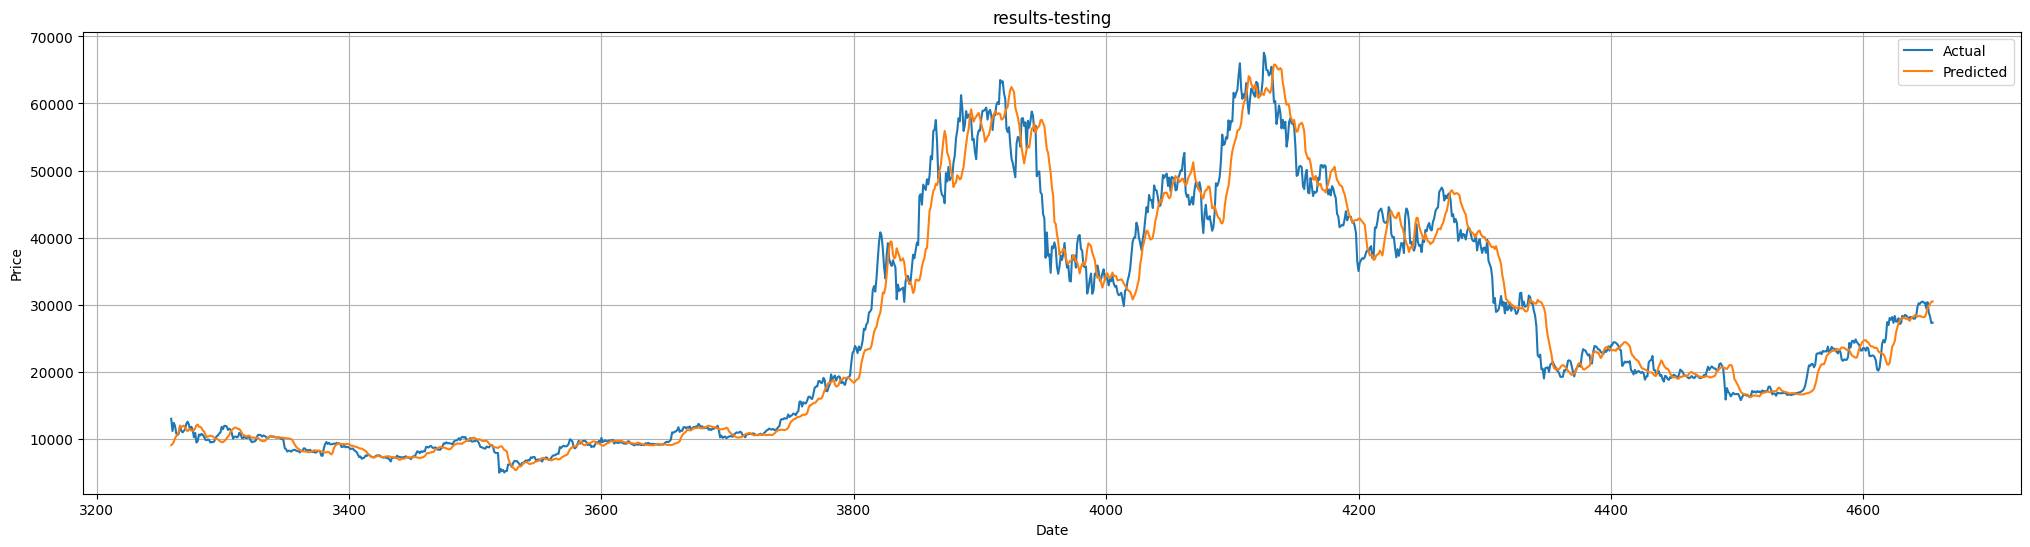

In [6]:
plot_result(sgd_result_test_df,'results-testing')

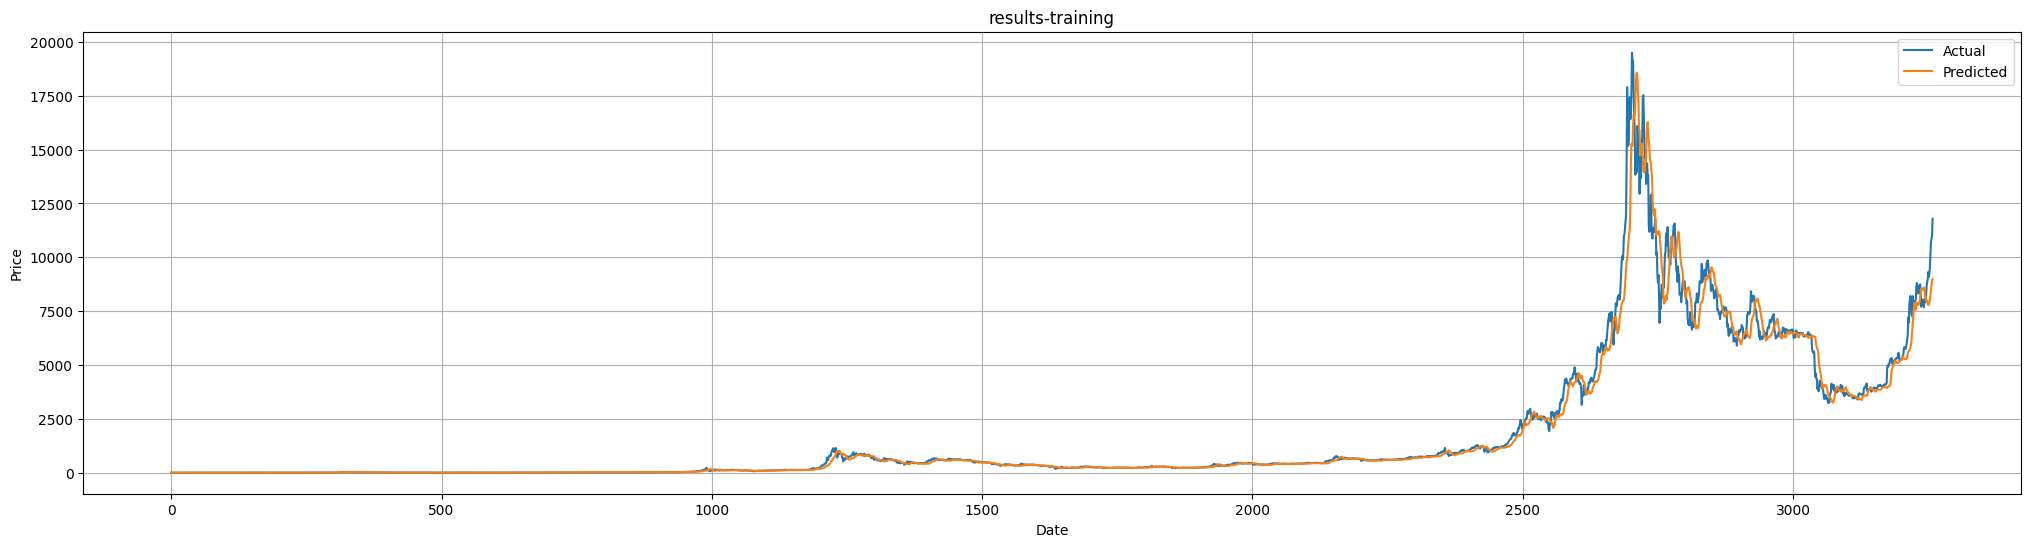

In [7]:
plot_result(sgd_result_train_df,'results-training')